<h1><center>Clusteranalysis on Creditcard-Dataset </center></h1>






**Import Packages**

In [ ]:
from sklearnex import patch_sklearn
patch_sklearn()


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
import geopandas as gpd
import matplotlib.ticker as mticker
from sklearn import metrics
from scipy.cluster import hierarchy
from scipy.sparse import lil_matrix
import os
from libpysal.weights import KNN

In [2]:
local_crs = 27700
place = "Glasgow_OS"
lat = 55.86421405612109
lng = -4.251846930489373
country = "UK"
crs=4326
radius=20


**Import Data**

In [3]:
output_directory = f"../output/{place}"

In [4]:
# Generate file names based on the naming pattern
file_names = [os.path.join(output_directory, f"percentile_chunk_{i}.pq") for i in range(200)]

# Initialize an empty list to store dataframes
dataframes = []

# Iterate over the generated file names and read each file
for file_name in file_names:
    if os.path.exists(file_name):
        try:
            df = pd.read_parquet(file_name)
            dataframes.append(df)
            print(f"Successfully read {file_name}")
        except Exception as e:
            print(f"Failed to read {file_name}. Error: {e}")
    else:
        print(f"File not found: {file_name}")

# Concatenate all the dataframes into one
combined_df = pd.concat(dataframes, ignore_index=True)

Successfully read ../output/Glasgow_OS\percentile_chunk_0.pq
Successfully read ../output/Glasgow_OS\percentile_chunk_1.pq
Successfully read ../output/Glasgow_OS\percentile_chunk_2.pq
Successfully read ../output/Glasgow_OS\percentile_chunk_3.pq
Successfully read ../output/Glasgow_OS\percentile_chunk_4.pq
Successfully read ../output/Glasgow_OS\percentile_chunk_5.pq
Successfully read ../output/Glasgow_OS\percentile_chunk_6.pq
Successfully read ../output/Glasgow_OS\percentile_chunk_7.pq
Successfully read ../output/Glasgow_OS\percentile_chunk_8.pq
Successfully read ../output/Glasgow_OS\percentile_chunk_9.pq
Successfully read ../output/Glasgow_OS\percentile_chunk_10.pq
Successfully read ../output/Glasgow_OS\percentile_chunk_11.pq
Successfully read ../output/Glasgow_OS\percentile_chunk_12.pq
Successfully read ../output/Glasgow_OS\percentile_chunk_13.pq
Successfully read ../output/Glasgow_OS\percentile_chunk_14.pq
Successfully read ../output/Glasgow_OS\percentile_chunk_15.pq
Successfully read 

In [5]:
combined_df.describe()

c:\Users\reube\anaconda3\envs\nbprocessor\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\reube\anaconda3\envs\nbprocessor\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\reube\anaconda3\envs\nbprocessor\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\reube\anaconda3\envs\nbprocessor\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\reube\anaconda3\envs\nbprocessor\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\reube\anaconda3\envs\nbprocessor\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarni

,height_25,height_50,height_75,buildings_neighbours_200_25,buildings_neighbours_200_50,buildings_neighbours_200_75,building_area_25,building_area_50,building_area_75,building_height_25,...,global_angular_closeness_75,global_angular_betweeness_25,global_angular_betweeness_50,global_angular_betweeness_75,edge_ID_25,edge_ID_50,edge_ID_75,length_25,length_50,length_75
count,828537.000000,828537.000000,828537.000000,828537.000000,828537.000000,828537.000000,828537.000000,828537.000000,828537.000000,828537.000000,...,766696.000000,769141.000000,7.691410e+05,769141.000000,769141.000000,769141.000000,769141.000000,828537.000000,828537.000000,828537.000000
mean,4.881334,7.263708,8.632223,7.024761,9.008665,13.120670,31.037682,61.899547,103.751631,4.881334,...,0.000791,0.000757,1.201226e-03,0.001858,41631.427858,41835.224812,42025.607524,27.579136,41.995877,62.143728
std,2.268792,2.058406,2.453892,4.126492,5.071618,7.824655,20.550888,37.572018,130.596422,2.268792,...,0.000529,0.006264,8.141241e-03,0.010320,23443.606018,23435.789075,23421.410090,20.255726,28.202852,39.682786
min,0.100000,0.200000,0.325000,0.000000,0.000000,0.000000,1.201012,1.286250,1.286250,0.100000,...,0.000358,0.000000,0.000000e+00,0.000000,5.000000,5.000000,5.000000,0.080623,0.537587,4.157376
25%,2.975000,6.300000,7.400000,4.042532,5.603606,7.976993,17.058103,44.242500,57.746649,2.975000,...,0.000662,0.000000,8.159249e-09,0.000024,22271.000000,22505.000000,22664.000000,15.692341,25.118025,37.241181
50%,4.475000,7.200000,8.100000,6.646352,8.475019,11.854299,25.362257,52.328000,78.589060,4.475000,...,0.000755,0.000024,4.743321e-05,0.000107,42243.500000,42545.000000,42790.250000,22.614094,35.057096,52.079836
75%,6.700000,8.000000,9.075000,9.536844,11.795910,17.011901,41.578774,71.420244,116.000148,6.700000,...,0.000865,0.000119,2.385182e-04,0.000499,61561.250000,61805.000000,61919.000000,33.067924,50.000000,74.286535
max,30.300000,43.800000,68.150000,39.269864,83.645378,99.580281,3012.876555,4075.443113,28840.560036,30.300000,...,0.023815,0.214737,2.147373e-01,0.214737,82838.000000,82844.000000,82844.000000,585.970463,623.789707,623.789707


**Impute missing data with mean**

In [14]:
tess = gpd.read_parquet(f"../output/{place}/tessellation_morphometric_p3.pq")

c:\Users\reube\anaconda3\envs\nbprocessor\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\reube\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\reube\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


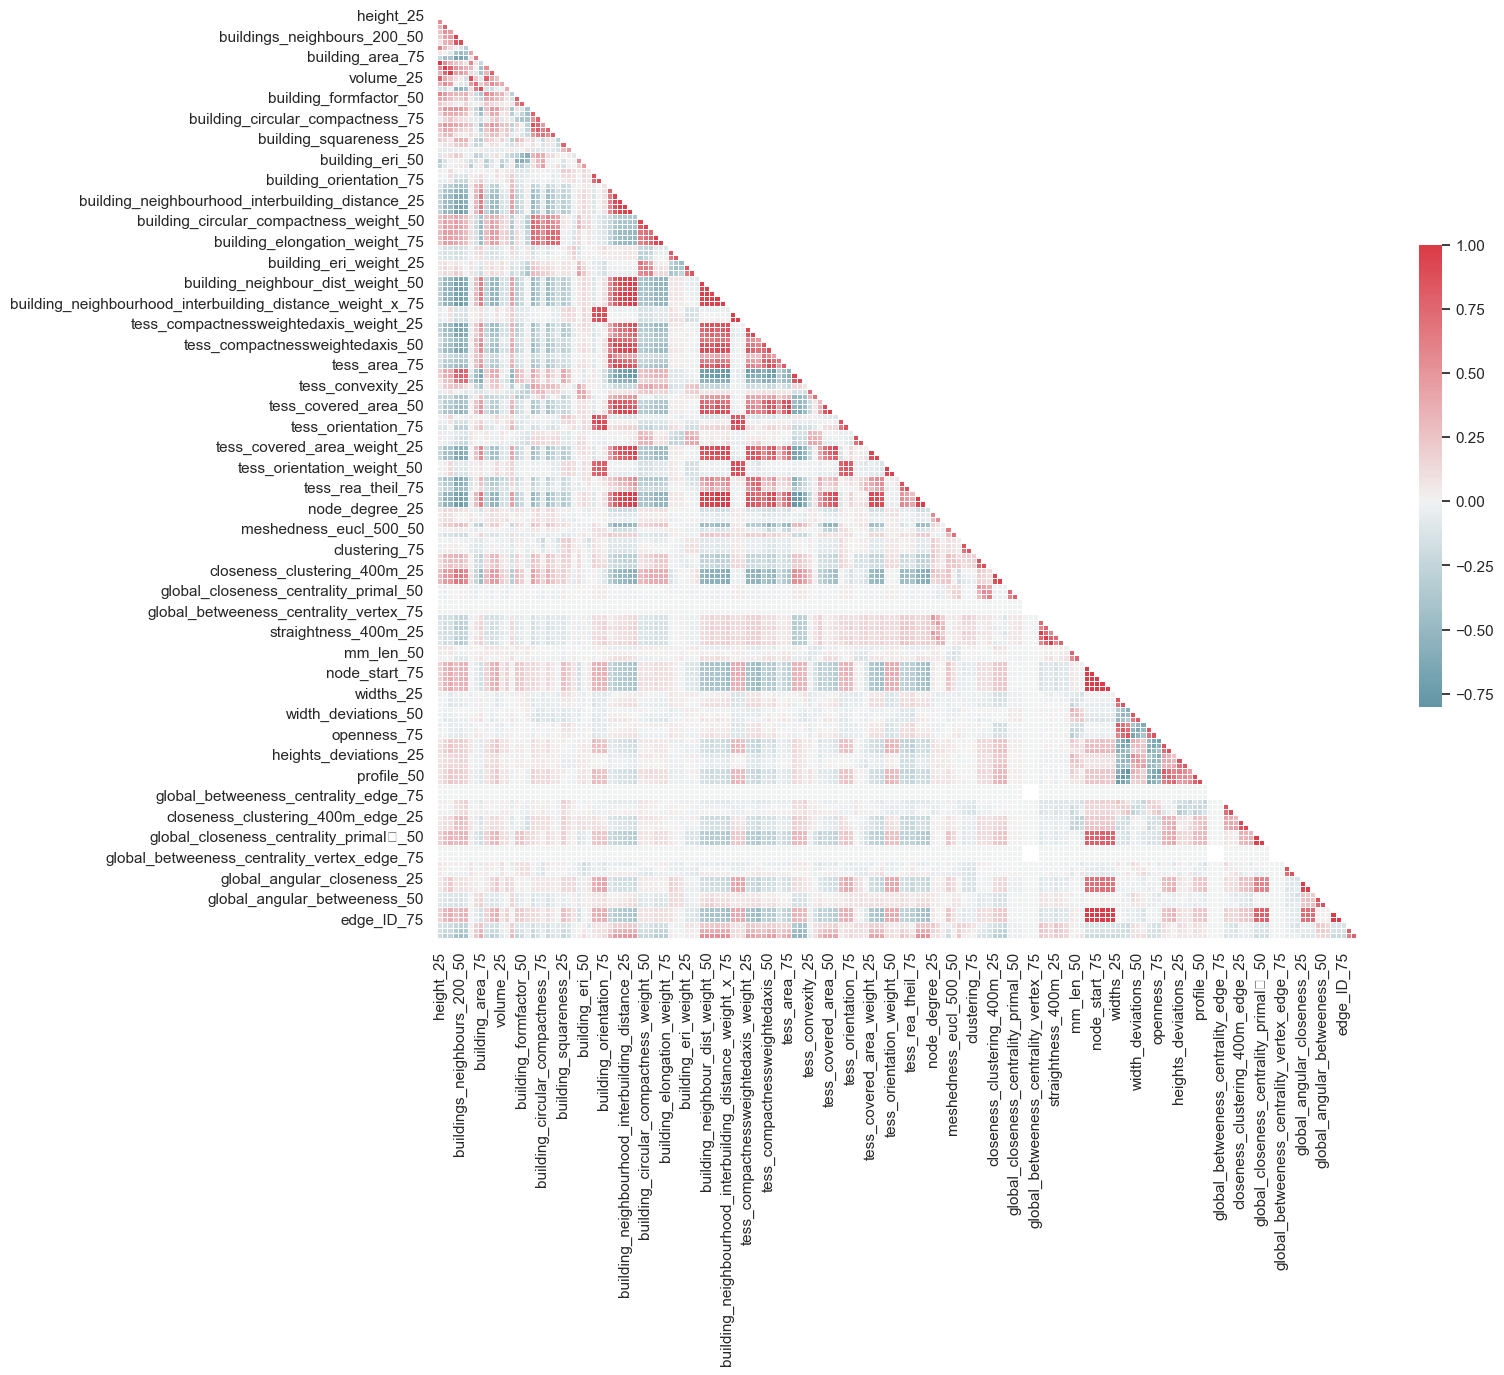

In [8]:
sns.set(style = "white")
cor_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cor_matrix, dtype = np.bool_))

plt.figure(figsize = (15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(cor_matrix, mask = mask, cmap = cmap, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

## Data Preprocessing

**Dealing with outliers**

The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

In [9]:
# Compute Z-score for every variable
#z = np.abs(stats.zscore(df))

# Remove outliers from dataset
#df_rem = df[(z < 3).all(axis=1)]
#df_rem

Or simply take the log of right-skewed variables to ensure good clustering results.

**Standardize data**

In [11]:
df = combined_df

In [12]:
# Standardise the contextual characters
cont_std = StandardScaler().fit_transform(df)
cont_std = pd.DataFrame(cont_std, columns=df.columns)

c:\Users\reube\anaconda3\envs\nbprocessor\Lib\site-packages\sklearn\utils\extmath.py:1069: RuntimeWarning: overflow encountered in square
  temp **= 2
c:\Users\reube\anaconda3\envs\nbprocessor\Lib\site-packages\sklearn\utils\extmath.py:1075: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\reube\anaconda3\envs\nbprocessor\Lib\site-packages\sklearn\utils\extmath.py:1075: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\reube\anaconda3\envs\nbprocessor\Lib\site-packages\sklearn\preprocessing\_data.py:83: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


In [22]:
tess = tess[["geometry"]]

In [26]:
# Build spatial matrix. We tried different methods and KNN seems the best so far.
n=3
w = KNN.from_dataframe(tess, k=n)

c:\Users\reube\anaconda3\envs\nbprocessor\Lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 455 disconnected components.
  warnings.warn(message)


In [30]:
cont_std = cont_std.fillna(0)

In [31]:
# Test different number of clusters/urban types (between 2 and 11)
cont_std_ = cont_std.copy()
K = range(2,30) 
s = {}

In [32]:
%%time
for k in K: 
    s[k] = []
    np.random.seed(123456) #for reproducibility
    model = AgglomerativeClustering(linkage='ward', connectivity=w.sparse, n_clusters=k)
    y = model.fit(cont_std)
    cont_std_['AHC_k'+ str(k)] = y.labels_
    print('silhouette at k=' + str(k) + ': ' + str(metrics.silhouette_score(cont_std, y.labels_, metric='euclidean')))
    s[k].append(metrics.silhouette_score(cont_std, y.labels_, metric='euclidean'))

c:\Users\reube\anaconda3\envs\nbprocessor\Lib\site-packages\sklearn\cluster\_agglomerative.py:304: UserWarning: the number of connected components of the connectivity matrix is 455 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


silhouette at k=2: 0.38840057508028397


In [ ]:
# Create the silhouette diagram  
vals = []
clus = []

for c, v in s.items():
    vals += v
    clus += [c]

In [ ]:
cont_std_.to_parquet(f"../output/{place}/cont_std_.pq")

In [ ]:
silhouettes = pd.DataFrame({'n_cluster': clus, 'silhouette': vals})

In [ ]:
# Plot the silhouette diagram. The best solution is usually a peak before a sudden drop. We would go with 6 in this case.
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(x="n_cluster", y="silhouette", data=silhouettes)
plt.ticklabel_format(style='plain')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.show()

In [ ]:
# rejoin geometries to the dataframe to be able to map results
cont_std_ = cont_std_.join(tess[['geometry']])
cont_std_ = gpd.GeoDataFrame(cont_std_, geometry=cont_std_['geometry'])

In [ ]:
buildings = gpd.read_parquet(f"../output/{place}/buildings_morphometric_p3.pq")
streets = gpd.read_parquet(f"../output/{place}/streets_raw.pq").explode().to_crs(local_crs).reset_index(drop=True)

In [ ]:
f, ax = plt.subplots(1, figsize=(100, 100))
streets.plot(ax=ax, edgecolor="white", lw=1, alpha=0.7, zorder=5)
buildings.plot(ax=ax, color='white', alpha=0.7, zorder=10)
cont_std_.plot(column='AHC_k12', categorical=True, legend=True, linewidth=0, ax=ax, cmap='tab20', zorder=0)
ax.set_axis_off()
plt.axis('equal')
plt.show()

In [ ]:
# join urban types to the dataframe to build the dendrogram
cont_std = cont_std.join(cont_std_[['AHC_k6']])

In [ ]:
group = cont_std.groupby('AHC_k6').mean()
Z = hierarchy.linkage(group, 'ward')
plt.figure(figsize=(10, 10))
dn = hierarchy.dendrogram(Z, labels=group.index)
plt.show()